In [1]:
import pickle
import sklearn
from sklearn.cluster import KMeans, DBSCAN
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import manifold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [ ]:
from FeatureExtraction import featureExtraction
model1 = models.vgg16(pretrained=True)
featureExtraction(model1, 'Image_featuresVGG16')

In [2]:
# Read features
infile = open('HogFeatures.pckl','rb')
features = pickle.load(infile)
infile.close()

In [3]:
features.shape

(2254, 8193)

# Classification (feature set HoG)

In [4]:
# Array to store results of classifiers
Results = np.empty((6,3), dtype='object')
Validation = np.empty((6,5), dtype='object')

In [5]:
# Split data
real_labels = features[:,-1]
features = features[:,:-1]
X_train, X_test, y_train, y_test = train_test_split(features, real_labels, test_size=0.2, stratify = real_labels)

## Logistic Regression

In [6]:
logistic = LogisticRegression(max_iter = 100000)
logistic.fit(X_train,y_train)

LogisticRegression(max_iter=100000)

Error train: 0.0 %
Error test: 3.325942350332589 %


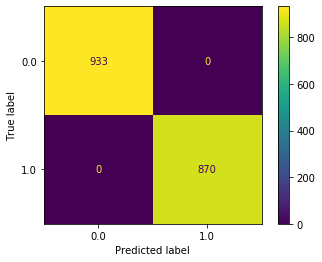

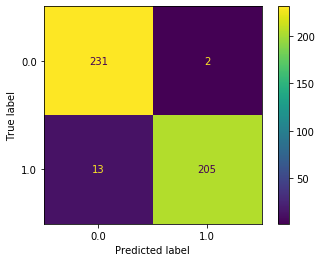

In [7]:
plot_confusion_matrix(logistic,X_train,y_train)
err = np.sum(logistic.predict(X_train) == y_train)/len(y_train)
Results[0,0]=str((1-err)*100)+"%"
print("Error train:",(1-err)*100,"%")

plot_confusion_matrix(logistic,X_test,y_test)
err = np.sum(logistic.predict(X_test) == y_test)/len(y_test)
Results[0,1]=str((1-err)*100)+"%"
print("Error test:",(1-err)*100,"%")


In [8]:
k = 5
cross_scores = cross_val_score(logistic, features, real_labels, cv=k, scoring='f1_weighted')
Validation[0,:] = cross_scores
print("Scores for k = ", k)
print("-->",cross_scores)

Scores for k =  5
--> [0.99778251 0.98224555 0.96674287 0.90837484 0.90667957]


## SVM (linear kernel)

In [9]:
parameters = {'C':[0.1,0.01,1,10]}
linear_kernel_svm_clf = SVC(kernel = "linear")
clf_linear = GridSearchCV(linear_kernel_svm_clf, parameters)
clf_linear.fit(X_train, y_train)
print(clf_linear.best_params_)
Results[1,2]=clf_linear.best_params_

{'C': 0.1}


In [10]:
clf_linear = SVC(kernel = "linear" , C = 0.1)
clf_linear.fit(X_train, y_train)

SVC(C=0.1, kernel='linear')

Error train: 0.0 %
Error test: 4.212860310421284 %


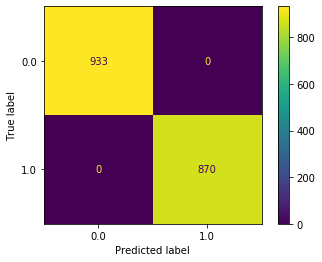

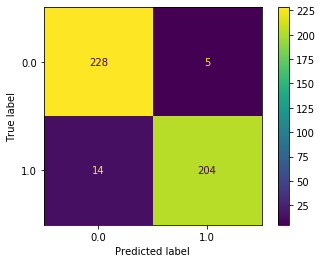

In [11]:
plot_confusion_matrix(clf_linear,X_train,y_train)
err = np.sum(clf_linear.predict(X_train) == y_train)/len(y_train)
Results[1,0]=str((1-err)*100)+"%"
print("Error train:",(1-err)*100,"%")

plot_confusion_matrix(clf_linear,X_test,y_test)
err = np.sum(clf_linear.predict(X_test) == y_test)/len(y_test)
Results[1,1]=str((1-err)*100)+"%"
print("Error test:",(1-err)*100,"%")

In [12]:
cross_scores = cross_val_score(clf_linear, features, real_labels, cv=k)
Validation[1,:] = cross_scores
print("Scores for k = ", k)
print("-->",cross_scores)

Scores for k =  5
--> [0.99113082 0.98226164 0.96230599 0.90022173 0.91333333]


## SVM (polynomial)

In [13]:
parameters = {'degree':[2,3,4,5], 'C':[0.1,0.01,1]}
poly_kernel_svm_clf = SVC(kernel = "poly")
clf = GridSearchCV(poly_kernel_svm_clf, parameters)
clf.fit(X_train, y_train)
print(clf.best_params_)
Results[2,2]=clf.best_params_

{'C': 1, 'degree': 2}


In [14]:
clf = SVC(kernel = "poly" , C = 1 , degree = 2)
clf.fit(X_train, y_train)

SVC(C=1, degree=2, kernel='poly')

Error train: 0.8319467554076532 %
Error test: 1.9955654101995512 %


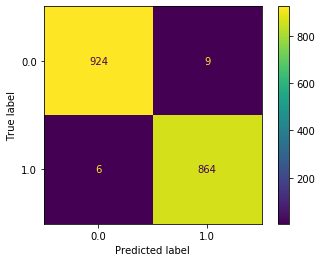

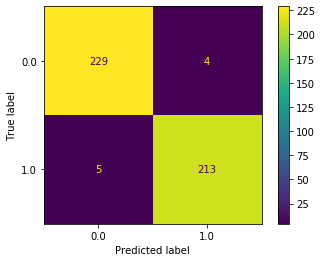

In [15]:
plot_confusion_matrix(clf,X_train,y_train)
err = np.sum(clf.predict(X_train) == y_train)/len(y_train)
Results[2,0]=str((1-err)*100)+"%"
print("Error train:",(1-err)*100,"%")

plot_confusion_matrix(clf,X_test,y_test)
err = np.sum(clf.predict(X_test) == y_test)/len(y_test)
Results[2,1]=str((1-err)*100)+"%"
print("Error test:",(1-err)*100,"%")

In [16]:
k = 5
cross_scores = cross_val_score(clf, features, real_labels, cv=k)
Validation[2,:] = cross_scores
print("Scores for k = ", k)
print("-->",cross_scores)

Scores for k =  5
--> [1.         1.         0.99334812 0.92239468 0.85333333]


## SVM (rbf)

In [17]:
parameters = {'C':[0.1,0.01,1]}
rbf_kernel_svm_clf = SVC(kernel = "rbf")
clf_rbf = GridSearchCV(rbf_kernel_svm_clf, parameters)
clf_rbf.fit(X_train, y_train)

GridSearchCV(estimator=SVC(), param_grid={'C': [0.1, 0.01, 1]})

In [18]:
print(clf_rbf.best_params_)
Results[3,2]=clf_rbf.best_params_

{'C': 1}


In [19]:
clf_rbf = SVC(kernel = "rbf", C = 1)
clf_rbf.fit(X_train, y_train)

SVC(C=1)

Error train: 0.2773155851358844 %
Error test: 1.1086474501108667 %


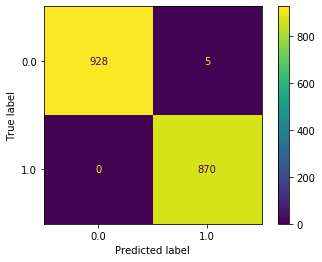

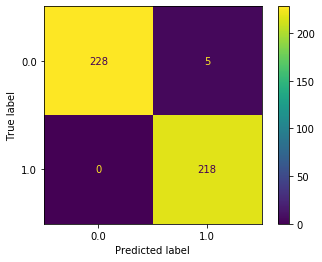

In [20]:
plot_confusion_matrix(clf_rbf,X_train,y_train)
err = np.sum(clf_rbf.predict(X_train) == y_train)/len(y_train)
Results[3,0]=str((1-err)*100)+"%"
print("Error train:",(1-err)*100,"%")

plot_confusion_matrix(clf_rbf, X_test,y_test)
err = np.sum(clf_rbf.predict(X_test) == y_test)/len(y_test)
Results[3,1]=str((1-err)*100)+"%"
print("Error test:",(1-err)*100,"%")

In [21]:
k = 5
cross_scores = cross_val_score(clf_rbf, features, real_labels, cv=k)
Validation[3,:] = cross_scores
print("Scores for k = ", k)
print("-->",cross_scores)

Scores for k =  5
--> [1.         1.         0.99113082 0.98669623 0.92888889]


## Random Forest

In [22]:
parameters = {'criterion':['gini', 'entropy'], 'max_depth':[2, 4, 6],}
random_forest = RandomForestClassifier()
clf_rf = GridSearchCV(random_forest, parameters)
clf_rf.fit(X_train, y_train)
print(clf_rf.best_params_)
Results[4,2]=clf_rf.best_params_

{'criterion': 'entropy', 'max_depth': 6}


In [23]:
clf_rf = RandomForestClassifier(criterion = 'entropy', max_depth = 6)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=6)

Error train: 0.443704936217415 %
Error test: 4.6563192904656265 %


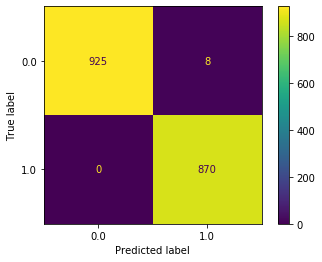

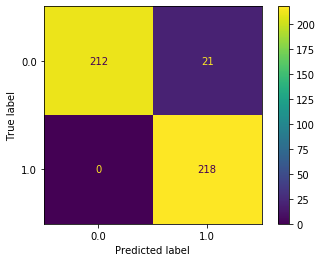

In [24]:
plot_confusion_matrix(clf_rf,X_train,y_train)
err = np.sum(clf_rf.predict(X_train) == y_train)/len(y_train)
Results[4,0]=str((1-err)*100)+"%"
print("Error train:",(1-err)*100,"%")

plot_confusion_matrix(clf_rf, X_test,y_test)
err = np.sum(clf_rf.predict(X_test) == y_test)/len(y_test)
Results[4,1]=str((1-err)*100)+"%"
print("Error test:",(1-err)*100,"%")

In [25]:
k = 5
cross_scores = cross_val_score(clf_rf, features, real_labels, cv=k)
Validation[4,:] = cross_scores
print("Scores for k = ", k)
print("-->", cross_scores)

Scores for k =  5
--> [0.99113082 1.         1.         0.93126386 0.63111111]


## Gradient Boosting

In [26]:
parameters = {'learning_rate':[ 1]}
clf_gb = GradientBoostingClassifier()
clf_gb = GridSearchCV(clf_gb, parameters)
clf_gb.fit(X_train, y_train)
print(clf_gb.best_params_)
Results[5,2]=clf_gb.best_params_

{'learning_rate': 1}


In [27]:
# pendiente tunear
clf_gb = GradientBoostingClassifier()
clf_gb.fit(X_train, y_train)

GradientBoostingClassifier()

Error train: 0.0 %
Error test: 1.7738359201773801 %


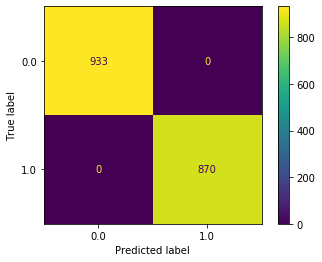

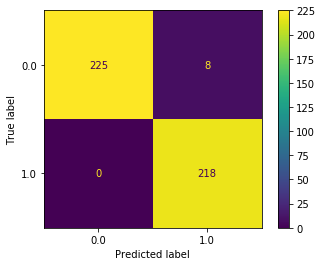

In [28]:
#print(clf_gb.best_params_)
Results[5,2]= 1

plot_confusion_matrix(clf_gb,X_train,y_train)
err = np.sum(clf_gb.predict(X_train) == y_train)/len(y_train)
Results[5,0]=str((1-err)*100)+"%"
print("Error train:",(1-err)*100,"%")

plot_confusion_matrix(clf_gb, X_test,y_test)
err = np.sum(clf_gb.predict(X_test) == y_test)/len(y_test)
Results[5,1]=str((1-err)*100)+"%"
print("Error test:",(1-err)*100,"%")

In [29]:
k = 5
cross_scores = cross_val_score(clf_gb, features, real_labels, cv=k)
Validation[5,k-2] = cross_scores
print("Scores for k = ", k)
print("-->",cross_scores)

Scores for k =  5
--> [0.99778271 1.         0.99778271 0.94456763 0.78666667]


# Results

In [30]:
df = pd.DataFrame(data=Results, index=["Logistic Regression", "SVM linear kernel","SVM polynomial kernel","SVM rbf kernel","Random Forest", "Gradient Boosting"], columns=["Error train","Error test","Parameters"])

In [31]:
df

,Error train,Error test,Parameters
Logistic Regression,0.0%,3.325942350332589%,None
SVM linear kernel,0.0%,4.212860310421284%,{'C': 0.1}
SVM polynomial kernel,0.8319467554076532%,1.9955654101995512%,"{'C': 1, 'degree': 2}"
SVM rbf kernel,0.2773155851358844%,1.1086474501108667%,{'C': 1}
Random Forest,0.443704936217415%,4.6563192904656265%,"{'criterion': 'entropy', 'max_depth': 6}"
Gradient Boosting,0.0%,1.7738359201773801%,1


In [32]:
print(df.to_latex(index=True,  bold_rows = True) )

\begin{tabular}{llll}
\toprule
{} &          Error train &           Error test &                                Parameters \\
\midrule
\textbf{Logistic Regression  } &                 0.0\% &   3.325942350332589\% &                                      None \\
\textbf{SVM linear kernel    } &                 0.0\% &   4.212860310421284\% &                                \{'C': 0.1\} \\
\textbf{SVM polynomial kernel} &  0.8319467554076532\% &  1.9955654101995512\% &                     \{'C': 1, 'degree': 2\} \\
\textbf{SVM rbf kernel       } &  0.2773155851358844\% &  1.1086474501108667\% &                                  \{'C': 1\} \\
\textbf{Random Forest        } &   0.443704936217415\% &  4.6563192904656265\% &  \{'criterion': 'entropy', 'max\_depth': 6\} \\
\textbf{Gradient Boosting    } &                 0.0\% &  1.7738359201773801\% &                                         1 \\
\bottomrule
\end{tabular}



In [36]:
Validation[5,:] = Validation[5,:][3]

In [37]:
Av = []
for i in range(6):
    Av.append(np.mean(Validation[i,:]))
Av = np.array(Av)
Av = Av.reshape(Av.shape[0],1)
Validation = np.append(Validation, Av, axis = 1)

In [38]:
df2 = pd.DataFrame(data = Validation, index=["Logistic Regression", "SVM linear kernel","SVM polynomial kernel","SVM rbf kernel","Random Forest", "Gradient Boosting"], columns=["Fold 1","Fold 2", "Fold 3", "Fold 4", "Fold 5", "Average"])

In [39]:
df2

,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Average
Logistic Regression,0.997783,0.982246,0.966743,0.908375,0.90668,0.952365
SVM linear kernel,0.991131,0.982262,0.962306,0.900222,0.913333,0.949851
SVM polynomial kernel,1,1,0.993348,0.922395,0.853333,0.953815
SVM rbf kernel,1,1,0.991131,0.986696,0.928889,0.981343
Random Forest,0.991131,1,1,0.931264,0.631111,0.910701
Gradient Boosting,0.997783,1,0.997783,0.944568,0.786667,0.94536


In [40]:
print(df2.to_latex(index=True, bold_rows = True))

\begin{tabular}{lllllll}
\toprule
{} &    Fold 1 &    Fold 2 &    Fold 3 &    Fold 4 &    Fold 5 &   Average \\
\midrule
\textbf{Logistic Regression  } &  0.997783 &  0.982246 &  0.966743 &  0.908375 &   0.90668 &  0.952365 \\
\textbf{SVM linear kernel    } &  0.991131 &  0.982262 &  0.962306 &  0.900222 &  0.913333 &  0.949851 \\
\textbf{SVM polynomial kernel} &         1 &         1 &  0.993348 &  0.922395 &  0.853333 &  0.953815 \\
\textbf{SVM rbf kernel       } &         1 &         1 &  0.991131 &  0.986696 &  0.928889 &  0.981343 \\
\textbf{Random Forest        } &  0.991131 &         1 &         1 &  0.931264 &  0.631111 &  0.910701 \\
\textbf{Gradient Boosting    } &  0.997783 &         1 &  0.997783 &  0.944568 &  0.786667 &   0.94536 \\
\bottomrule
\end{tabular}



## Dimensionality Reduction

In [42]:
X_e= manifold.TSNE( metric='euclidean', method='barnes_hut').fit_transform(features)

In [44]:
def plotPredictions(Xe,target,pred,title):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.title.set_text('Real')
    ax2.title.set_text('Predicted')
    ax1.scatter(Xe[target==0,0],Xe[target==0,1],c="c",label="Empty")
    ax1.scatter(Xe[target==1,0],Xe[target==1,1],c="black",label="Occupied")
    ax2.scatter(Xe[pred==0,0],Xe[pred==0,1],c="c",label="Empty")
    ax2.scatter(Xe[pred==1,0],Xe[pred==1,1],c="black",label="Occupied")
    handles, labels = ax1.get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center')
    fig.set_size_inches(10, 5, forward=True)
    fig.suptitle(title)
    plt.show()

## Learning in lower dimensions (train best performance classifier in higher)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_e, real_labels, test_size=0.2, stratify = real_labels)

### Logistic Regression

In [45]:
logistic = LogisticRegression(max_iter = 100000)
logistic.fit(X_train,y_train)

LogisticRegression(max_iter=100000)

Error train: 10.759844703272325 %
Error test: 10.864745011086473 %


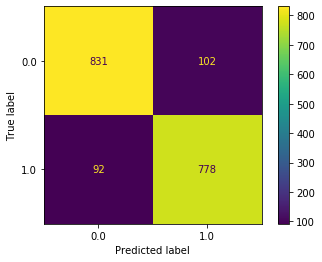

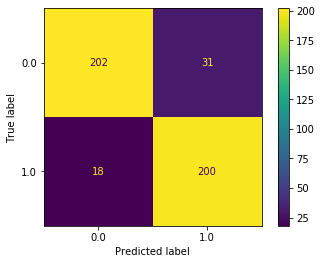

In [46]:
plot_confusion_matrix(logistic,X_train,y_train)
err = np.sum(logistic.predict(X_train) == y_train)/len(y_train)
print("Error train:",(1-err)*100,"%")

plot_confusion_matrix(logistic,X_test,y_test)
err = np.sum(logistic.predict(X_test) == y_test)/len(y_test)
print("Error test:",(1-err)*100,"%")

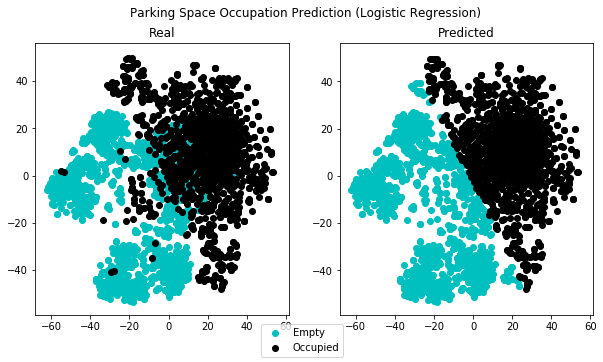

In [47]:
labels = logistic.predict(X_e)
plotPredictions(X_e, real_labels, labels,"Parking Space Occupation Prediction (Logistic Regression)")

### SVM (rbf)

In [48]:
clf_rbf = SVC(kernel = "rbf", C = 1)
clf_rbf.fit(X_train, y_train)

SVC(C=1)

Error train: 8.54132002218525 %
Error test: 9.756097560975608 %


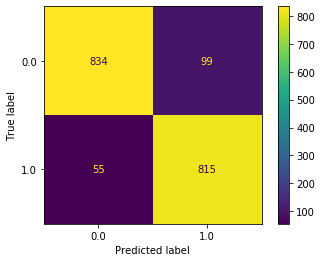

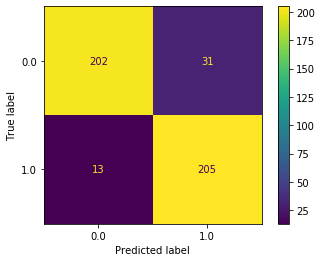

In [49]:
plot_confusion_matrix(clf_rbf,X_train,y_train)
err = np.sum(clf_rbf.predict(X_train) == y_train)/len(y_train)
print("Error train:",(1-err)*100,"%")

plot_confusion_matrix(clf_rbf, X_test,y_test)
err = np.sum(clf_rbf.predict(X_test) == y_test)/len(y_test)
print("Error test:",(1-err)*100,"%")

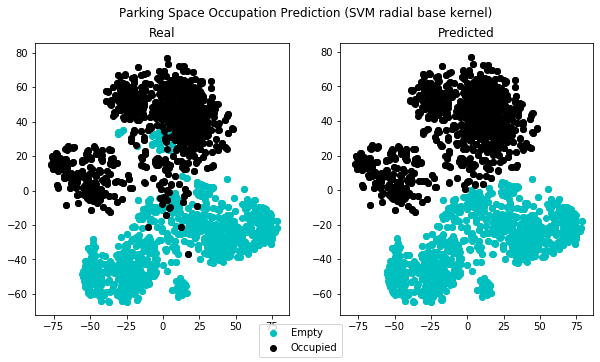

In [71]:
labels = clf_rbf.predict(X_e)
plotPredictions(X_e, real_labels, labels,"Parking Space Occupation Prediction (SVM radial base kernel)")

## Unsupervised Learning 

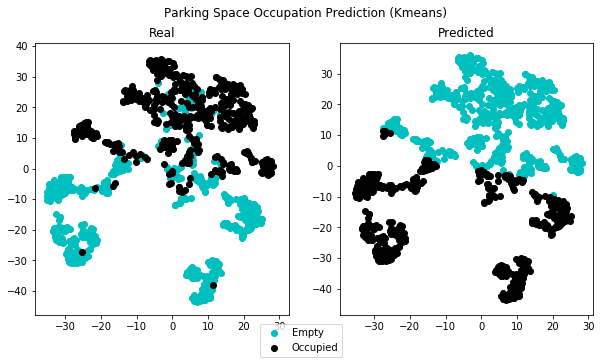

[[ 71 396]
 [412  23]]


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_e, real_labels, test_size=0.4, stratify = real_labels)
X_etest= manifold.TSNE( metric='euclidean', method='barnes_hut').fit_transform(X_test) 
km = KMeans(n_clusters=2)
km.fit(X_train)
labels = km.predict(X_test)
plotPredictions(X_etest, y_test, labels,"Parking Space Occupation Prediction (Kmeans)")
print(sklearn.metrics.confusion_matrix(y_test,labels))